<a href="https://colab.research.google.com/github/SDPreetham/Netflix_Case_Study/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX BUSINESS CASE**
                                                 
###                                                 -Case study by S D Preetham



1.	Defining Problem Statement and Analysing basic metrics

•	The Netflix dataset presents the details of all the movies and TV shows available on Netflix streaming platform.It also includes details  such as - cast, directors, ratings, release year, duration, etc.

•	The objective of this case study is to analyse the given data and generate insights that could assist Netflix in enhancing business across various countries.


In [53]:
import numpy as np
import pandas as pd

In [54]:
df = pd.read_csv('netflix.csv')
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [55]:
len(df[df['type']=='TV Show']) #Total TV Show count

2676

In [56]:
df.info() # For data types of all attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [57]:
# Finding missing values

missing = df.isna().sum()
missing_percent = (missing/len(df))*100
statistical_Summary = pd.DataFrame({'Missing_values':missing, 'Missing Percentage':missing_percent
                                    }).sort_values(by='Missing Percentage',ascending=False)
statistical_Summary



,Missing_values,Missing Percentage
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


2.	Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [58]:
missing_data_summary = pd.DataFrame({
    'Missing Values': missing,
    'Missing Percentage (%)': missing_percent
}).sort_values(by='Missing Percentage (%)', ascending=False)
missing_data_summary

,Missing Values,Missing Percentage (%)
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [59]:
categorical_columns = ['Type', 'Rating', 'Country', 'Listed_in']  # Identify categorical columns
value_counts_summary = {}

for col in categorical_columns:
    if col in df.columns:
        value_counts_summary[col] = df[col].value_counts()


for col, counts in value_counts_summary.items():
    print(f"\n--- {col} ---")
    print(counts.head(10))

  # Step 2: Unique Attributes for All Columns
unique_attributes_summary = {}

for col in df.columns:
    unique_values = df[col].nunique()
    unique_attributes_summary[col] = unique_values

print("\nValue Counts for Categorical Columns:")
for col, counts in value_counts_summary.items():
    print(f"\n--- {col} ---")
    print(counts.head(10))  # Display top 10 most common values

# Unique Attributes
print("\nUnique Attributes for Each Column:")
for col, unique_count in unique_attributes_summary.items():
    print(f"{col}: {unique_count} unique values")


Value Counts for Categorical Columns:

Unique Attributes for Each Column:
show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


3.	Non-Graphical Analysis: Value counts and unique attributes

In [60]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [61]:
# Performing un-nesting of the columns
# Un-nesting Directors

# Creating a list of directors for each title
Director_unique = df['director'].apply(lambda x: str(x).split(', ')).tolist()
# Creating a dataframe with separate column for each director of a given movie title
df_director = pd.DataFrame(Director_unique, index=df['title'])
# Performing stacking to segregate directors of a given title into multiple rows
df_director = df_director.stack()
# Index Reset
df_director = pd.DataFrame(df_director.reset_index())
df_director.head(20)
# Renaming '0' to Directors
df_director.rename(columns ={0:'Director'}, inplace = True)
# Dropping irrelavant column 'level_1'
df_director.drop(['level_1'], axis = 1, inplace = True)
df_director.head(20)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [62]:
# Un-nesting cast column

# Creating a list of cast for each title
Cast_unique = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
# Creating a dataframe with separate column for each cast of a given movie title
df_cast = pd.DataFrame( Cast_unique, index = df['title'])
# Performing stacking to segregate cast of a given title into multiple rows
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast.reset_index())
df_cast.rename(columns ={0:'Cast'}, inplace = True)
df_cast.drop(['level_1'], axis = 1, inplace = True)
df_cast.head(25)

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


In [63]:
Gen_unique = df['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
df_genre = pd.DataFrame( Gen_unique, index = df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre.reset_index())
df_genre.rename(columns ={0:'Genre'}, inplace = True)
df_genre.drop(['level_1'], axis = 1, inplace = True)
df_genre.head(25)


,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


In [64]:
Con_unique = df['country'].apply(lambda x: str(x).split(', ')).to_list()
df_country = pd.DataFrame( Con_unique, index = df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country.reset_index())
df_country.rename(columns ={0:'Country'}, inplace = True)
df_country
df_country.drop(['level_1'], axis = 1, inplace = True)
df_country.head(25)


,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


In [65]:
# Merging the dataframes sequentially
df_new1 = df_cast.merge(df_director, on ='title', how='inner')
df_new2 = df_new1.merge(df_genre, on='title', how='inner')
df_new = df_new2.merge(df_country,on='title', how ='inner')

# Replacing NaN Values
df_new['Cast'].replace(['nan'],['Unknown Actor'], inplace = True)
df_new['Director'].replace(['nan'],['Unknown Director'], inplace = True)
df_new['Genre'].replace(['nan'],['Unknown Genre'], inplace = True)
df_new['Country'].replace(['nan'],[np.nan], inplace = True)
df_new.head(10)



<ipython-input-65-075a03d775e4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Cast'].replace(['nan'],['Unknown Actor'], inplace = True)
<ipython-input-65-075a03d775e4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,title,Cast,Director,Genre,Country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa
6,Blood & Water,Khosi Ngema,Unknown Director,TV Mysteries,South Africa
7,Blood & Water,Gail Mabalane,Unknown Director,International TV Shows,South Africa
8,Blood & Water,Gail Mabalane,Unknown Director,TV Dramas,South Africa
9,Blood & Water,Gail Mabalane,Unknown Director,TV Mysteries,South Africa


In [66]:
#Merging the pre-processed data with remaining columns
df_final = df_new.merge(df[['show_id','type','title','date_added','release_year','rating','duration']],
                        on=['title'], how='left')
df_final.head()


,title,Cast,Director,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [67]:
df_final.isnull().sum()



,0
title,0
Cast,0
Director,0
Genre,0
Country,11897
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [68]:

df_final.loc[df_final['duration'].isnull(),'duration'] = df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']   ='NR'
df_final.isnull().sum()

,0
title,0
Cast,0
Director,0
Genre,0
Country,11897
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [69]:
#Imputation for Directors
for i in df_final[df_final['Country'].isnull()]['Director'].unique():
  if i in df_final[~df_final['Country'].isnull()]['Director'].unique():
    imp = df_final[df_final['Director']==i]['Country'].mode().values[0]
    df_final.loc[df_final['Director']==i,'Country'] = df_final.loc[df_final['Director']==i,'Country'].fillna(imp)

The code fills missing countries by using directors for that corresponding country, and replacing by most frequently appearing country of the director.

In [70]:
#Imputation for Date added
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp = df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added'] = df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

The code finds all movies or TV shows missing a "date added" value. It then groups these movies/shows by their "release year." For each group, it finds the most common "date added" value among the movies/shows within that group that have a "date added" value. Finally, it uses this most common "date added" value to fill in the missing "date added" values for all the movies/shows within that group. This is done under the assumption that movies released in the same year are likely to be added to Netflix around the same time.

In [71]:
#Imputation of countries using cast
for i in df_final[df_final['Country'].isnull()]['Cast'].unique():
  if i in df_final[~df_final['Country'].isnull()]['Cast'].unique():
    imp = df_final[df_final['Cast']==i]['Country'].mode().values[0]
    df_final.loc[df_final['Cast']==i,'Country'] = df_final.loc[df_final['Cast']==i,'Country'].fillna(imp)
#In case of further nulls,replace by Unknown Country
df_final['Country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

<ipython-input-71-955d270ba167>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Country'].fillna('Unknown Country',inplace=True)


,0
title,0
Cast,0
Director,0
Genre,0
Country,0
show_id,0
type,0
date_added,0
release_year,0
rating,67


In [72]:
df_final['duration'] = df_final['duration'].str.replace('min','')
df_final.head()

,title,Cast,Director,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [73]:
df_final['duration_copy'] = df_final['duration'].copy()
df_final1 = df_final.copy()

In [74]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']= df_final1['duration_copy'].astype(int)
df_final1.head()

,title,Cast,Director,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [75]:
df_final1['duration_copy'].describe()

,duration_copy
count,201991.000000
mean,77.152789
std,52.269154
min,0.000000
25%,0.000000
50%,95.000000
75%,112.000000
max,312.000000


<ipython-input-76-c16a3fdbc935>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final1['duration_copy'],hist = True,kde = True, bins = int(36),color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})


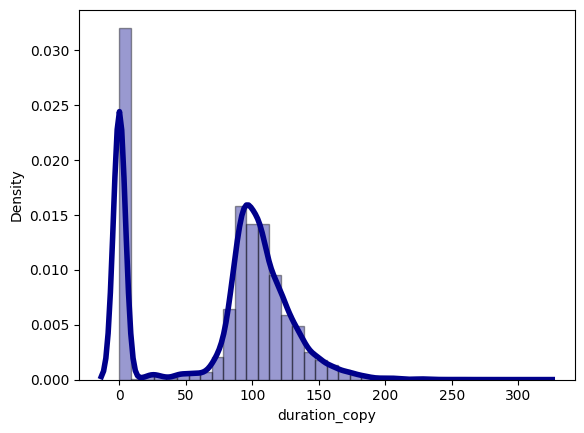

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df_final1['duration_copy'],hist = True,kde = True, bins = int(36),color='darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth':4})
plt.show()

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis
4.2 For categorical variable(s): Boxplot
4.3 For correlation: Heatmaps, Pairplots


In [77]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins = bins1,labels = labels1)
df_final1.head()

,title,Cast,Director,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


Finding the most watched genre across all countries:

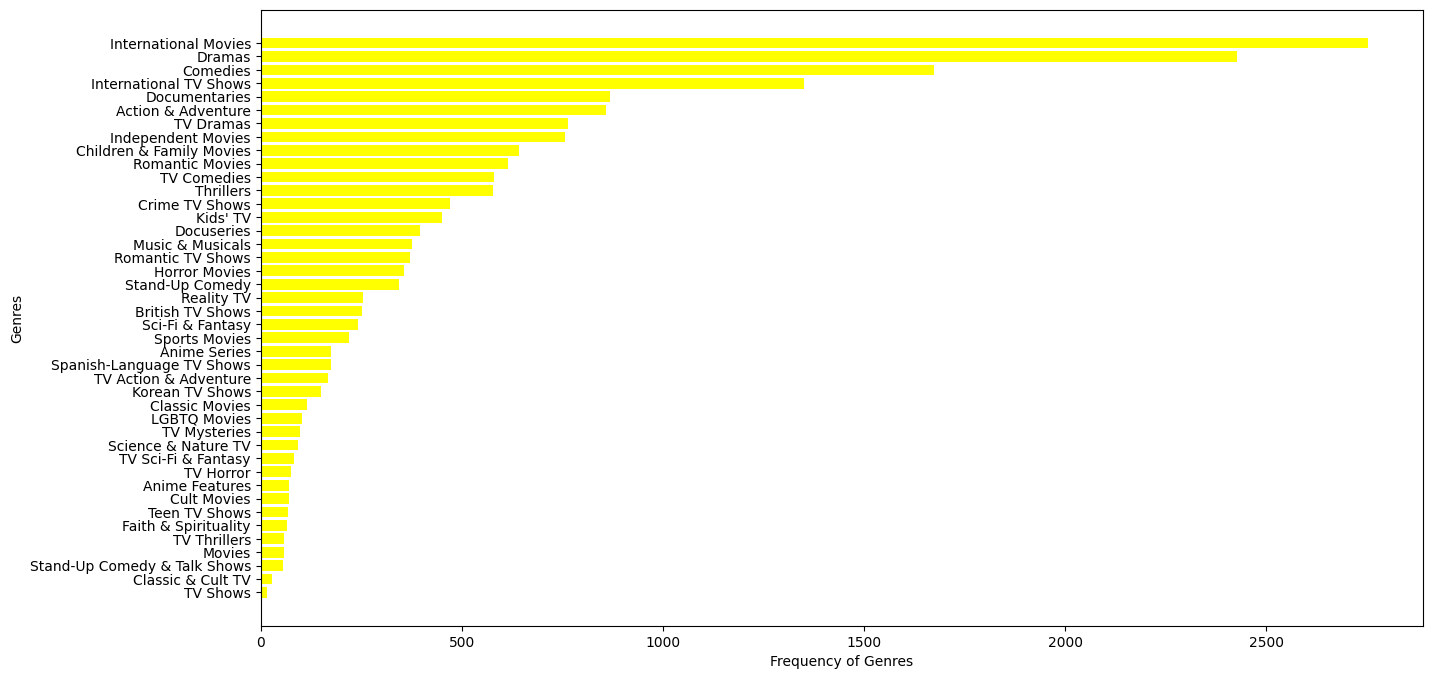

In [78]:
df_genre = df_final1.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

It is observed that ‘International Movies’ is the most watched Genre all across.

Number of distinct titles based on type:

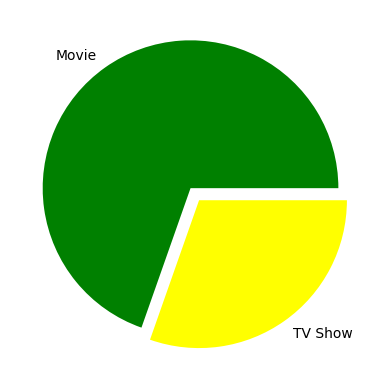

In [79]:
df_type = df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'], explode=(0.05,0.05), labels= df_type['type'], colors=['green','yellow'])
plt.show()

We have a ratio of nearly 70:30 for Movies over TV shows.

Distinct Movie Titles for each country:

In [80]:
# Distinct Titles on basis of country
df_final1.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)

,Country,title
119,United States,4248
47,India,1138
117,United Kingdom,829
22,Canada,460
38,France,409
...,...,...
34,Ecuador,1
33,East Germany,1
32,Dominican Republic,1
106,Sri Lanka,1


Insight: It is observed that Netflix adds the highest       number of movies in the United States, countries such as Ecuador, Sri Lanka, Ethiopia contribute to the lowest number.

Distinct titles based on ratings:

In [81]:
# Number of distinct titles based on rating
df_final1.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)

,rating,title
8,TV-MA,3207
6,TV-14,2160
9,TV-PG,863
5,R,799
4,PG-13,490
11,TV-Y7,334
10,TV-Y,307
3,PG,287
7,TV-G,220
2,NR,83


Insights: It is observed that the large number of movies have been rated TV-MA, while there are only 3 movies with
UR rating. It can be inferred that a large portion of movies are for Mature Audience.


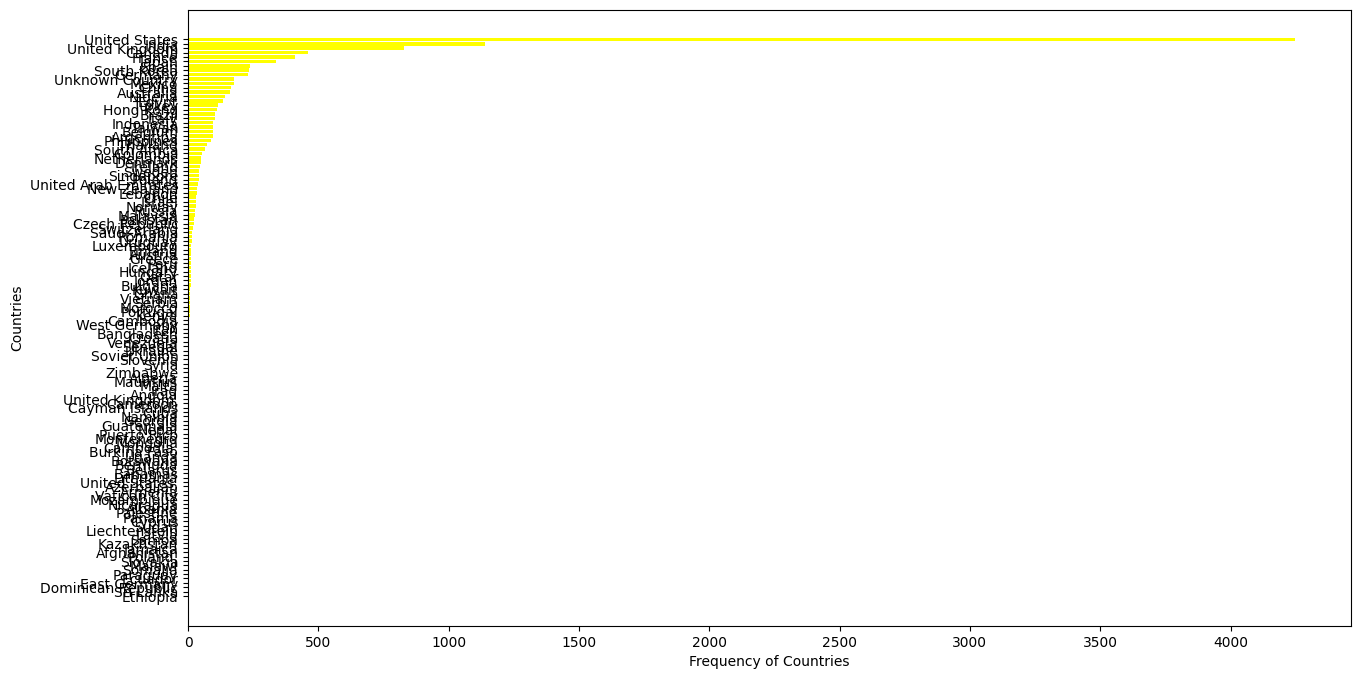

In [82]:
df_country = df_final1.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['Country'],df_country[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of Countries')
plt.ylabel('Countries')
plt.show()

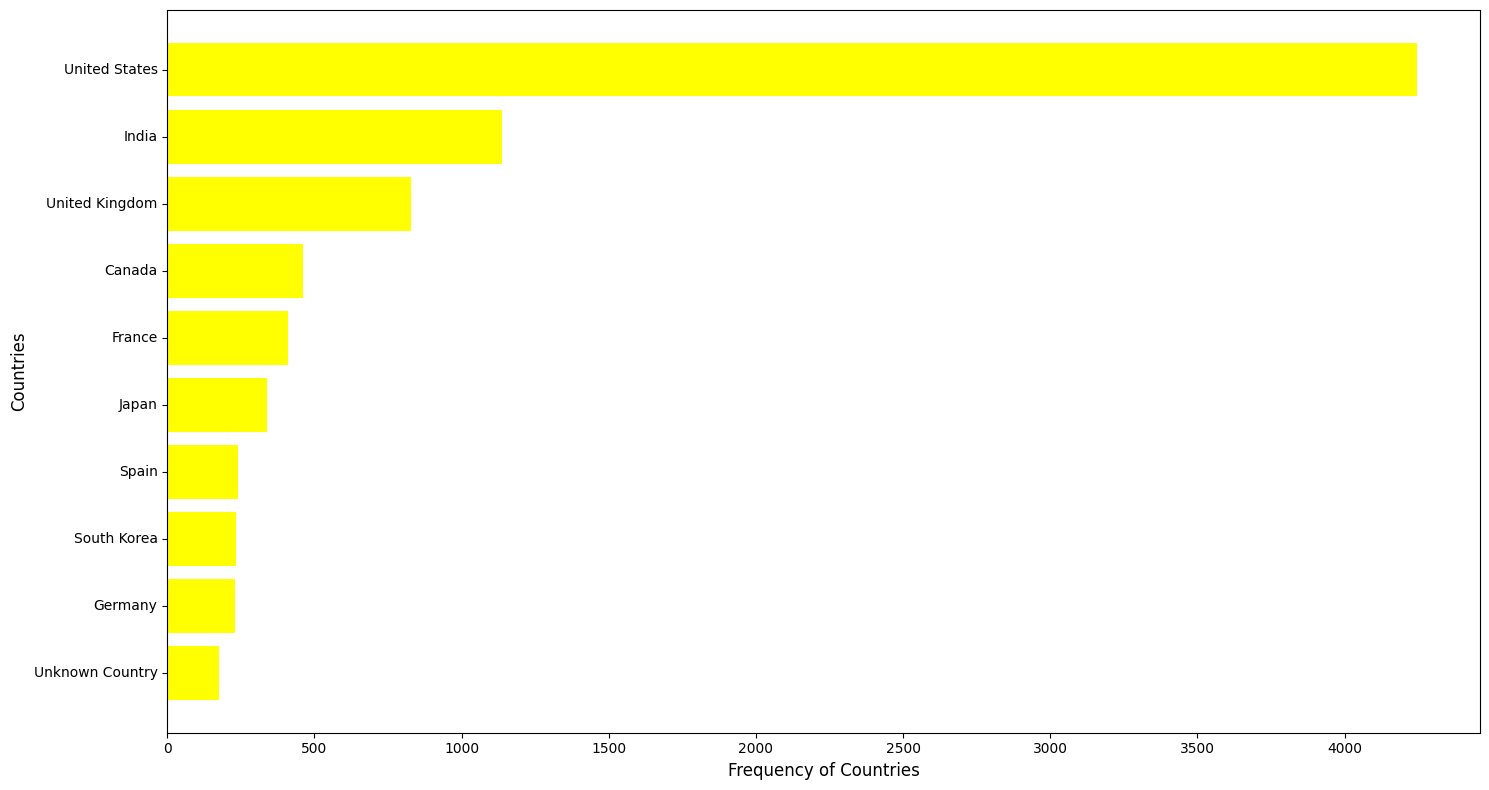

In [83]:
# Group and aggregate data
df_country = df_final1.groupby(['Country']).agg({'title': 'nunique'}).reset_index()
df_country = df_country.sort_values(by='title', ascending=False).head(10)  # Select top 10 countries

# Create a horizontal bar plot
plt.figure(figsize=(15, 8))
plt.barh(df_country[::-1]['Country'], df_country[::-1]['title'], color='yellow')  # Reverse order for a descending bar chart
plt.xlabel('Frequency of Countries', fontsize=12)
plt.ylabel('Countries', fontsize=12)

# Adjust y-axis label spacing and plot layout
plt.yticks(fontsize=10, va='center')
plt.tight_layout()
plt.show()


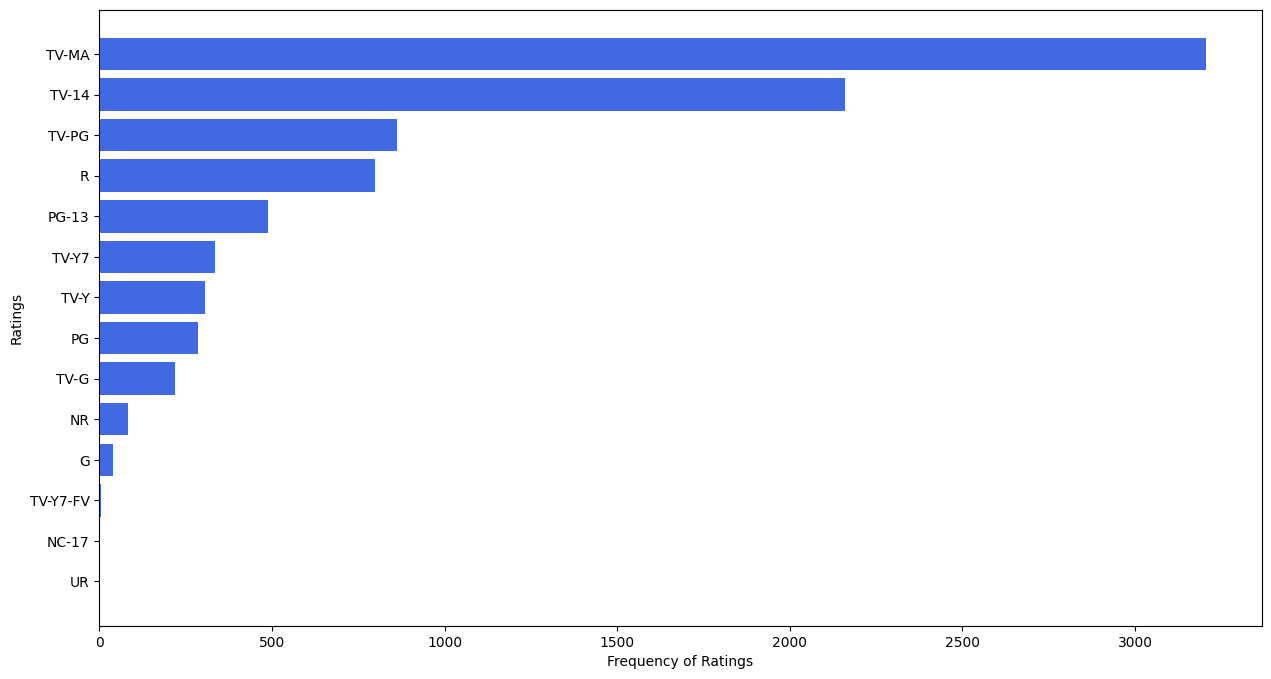

In [84]:
df_rating = df_final1.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]['title'],color = ['royalblue'])
plt.xlabel('Frequency of Ratings')
plt.ylabel('Ratings')
plt.show()

<ipython-input-85-c1f1d810a924>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_duration = df_final1.groupby(['duration_copy']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

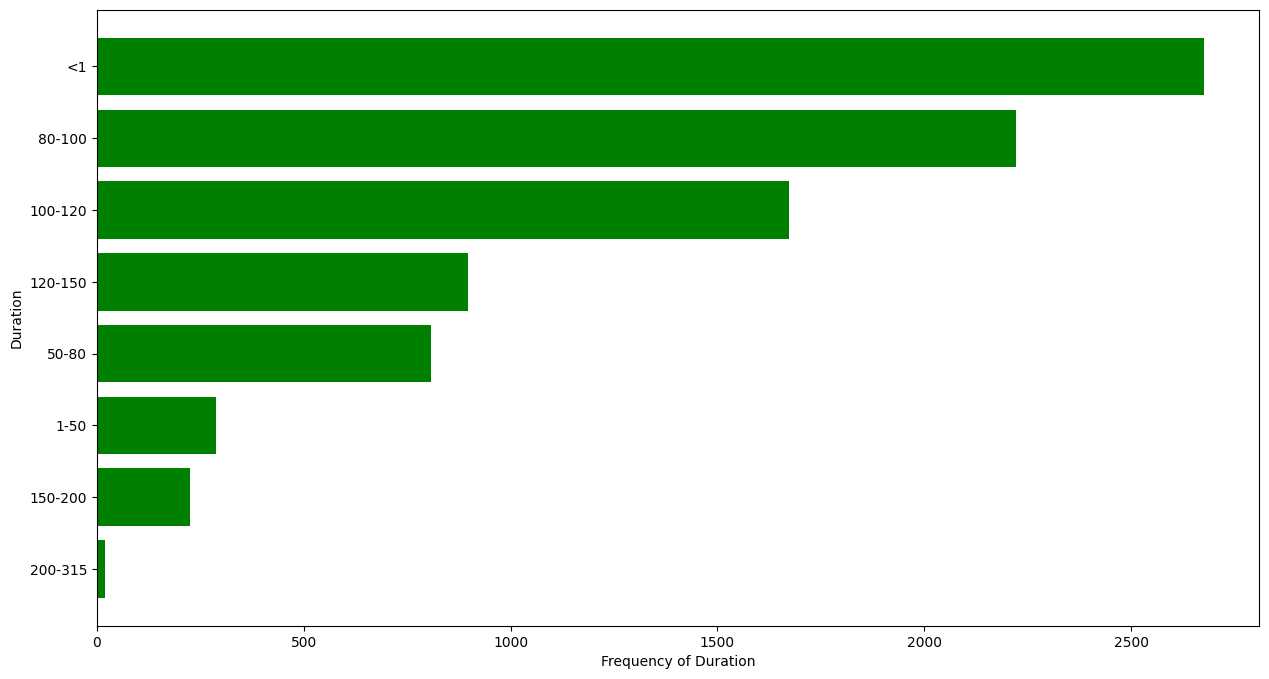

In [85]:
df_duration = df_final1.groupby(['duration_copy']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration_copy'],df_duration[::-1]['title'],color = ['green'])
plt.xlabel('Frequency of Duration')
plt.ylabel('Duration')
plt

Count of the acted movies for each actor

In [86]:
# Number of distinct titles on the basis of actors
df_final1.groupby(['Cast']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)

,Cast,title
34214,Unknown Actor,825
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
...,...,...
14221,Jamie Lee,1
14219,Jamie Kenna,1
14218,Jamie Kaler,1
14217,Jamie Johnston,1


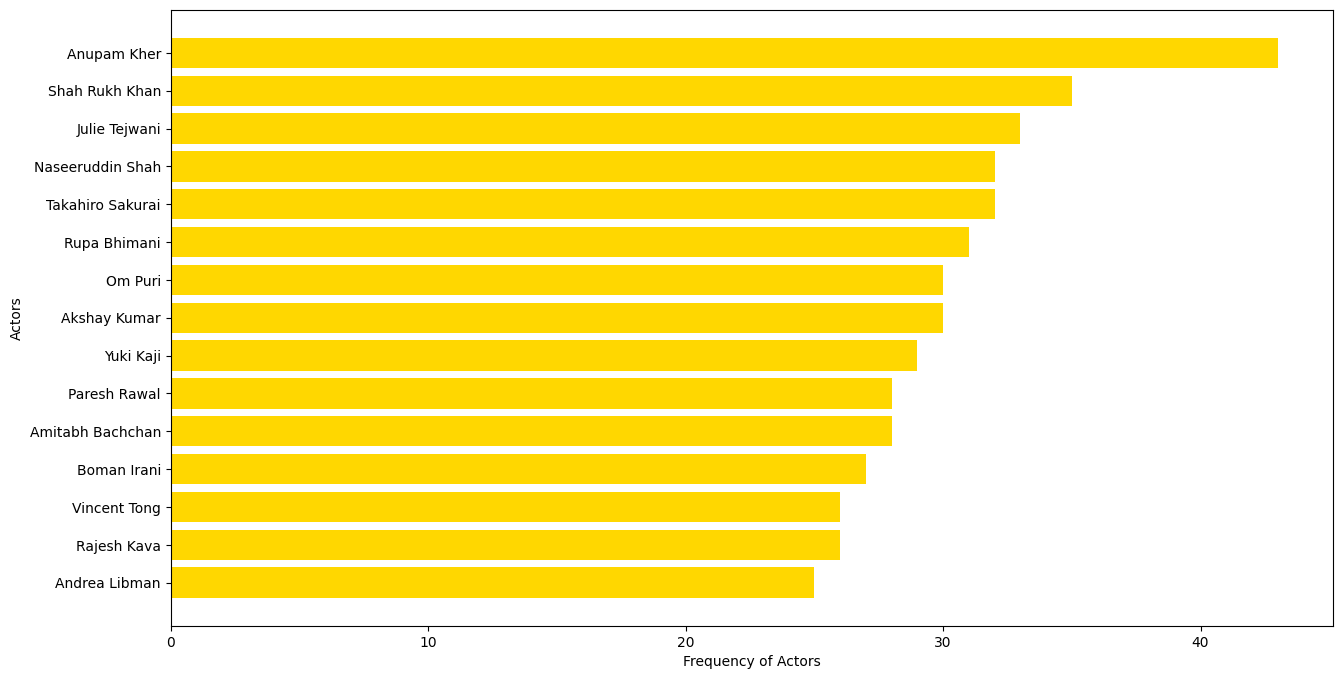

In [87]:
df_actors = df_final1.groupby(['Cast']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)
df_actors = df_actors[df_actors['Cast'] != 'Unknown Actor'].head(15)
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Cast'],df_actors[::-1]['title'],color = ['gold'])
plt.xlabel('Frequency of Actors')
plt.ylabel('Actors')
plt.show()

Insight:  It is observed that Anupam Kher has acted in the most number of movies, followed by Shah Rukh Khan.

Analysis of the director with the highest number of movies:

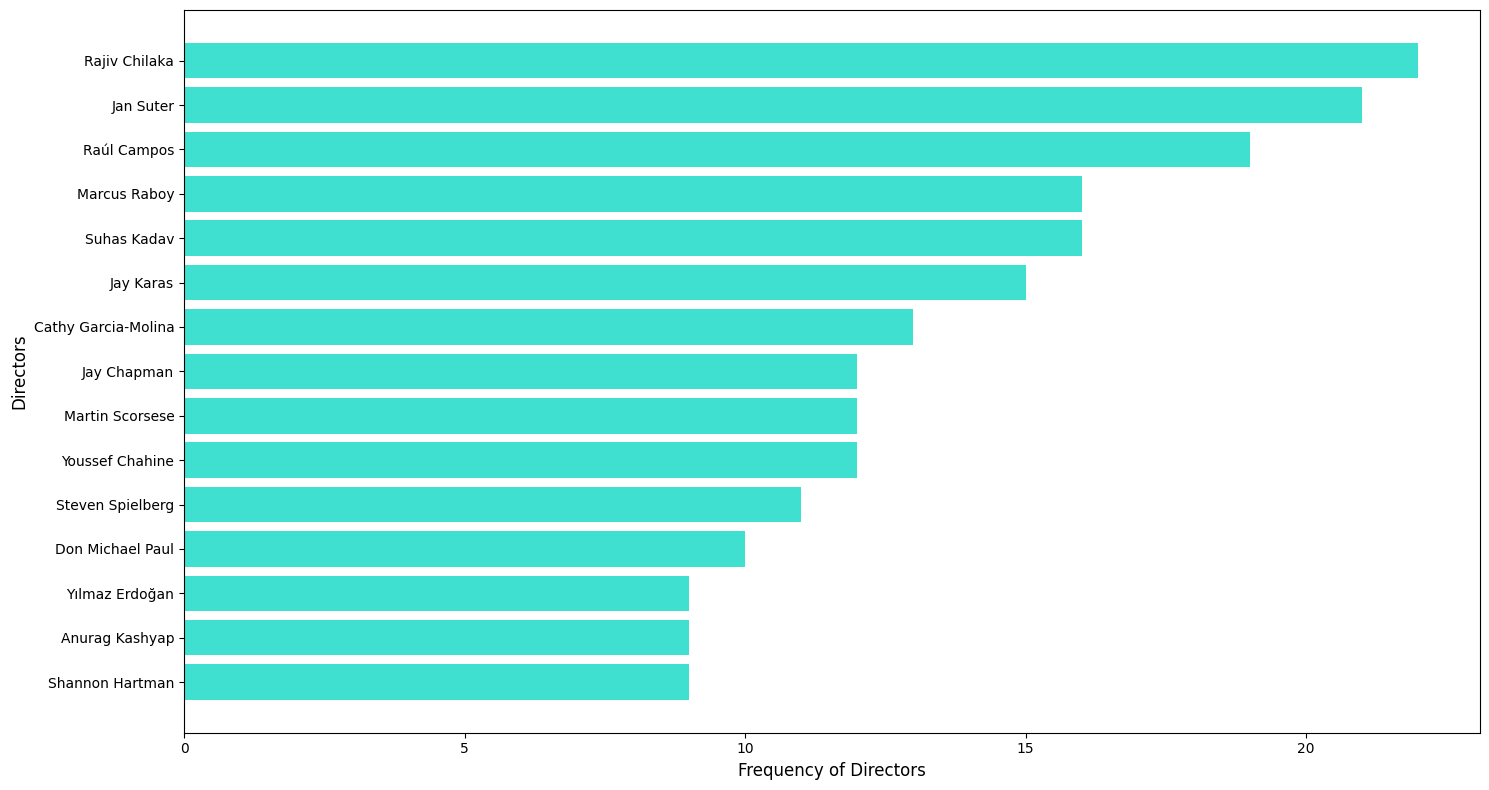

In [88]:
# Group and aggregate data
df_directors = df_final1.groupby(['Director']).agg({'title': 'nunique'}).reset_index()
df_directors = df_directors.sort_values(by='title', ascending=False)

# Filter out rows where the Director is 'Unknown Director'
df_directors = df_directors[df_directors['Director'] != 'Unknown Director'].head(15)

# Create a horizontal bar plot
plt.figure(figsize=(15, 8))
plt.barh(df_directors['Director'][::-1], df_directors['title'][::-1], color='turquoise')  # Reverse order for descending bar chart
plt.xlabel('Frequency of Directors', fontsize=12)
plt.ylabel('Directors', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


Insight:   It is observed that Rajiv Chilika turns out to be the director for the highest number of movies, followed by Jan Suter.

In [89]:
#Count of unique movies yearwise
df_final1.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)

,release_year,title
70,2018,1147
69,2017,1032
71,2019,1030
72,2020,953
68,2016,902
...,...,...
11,1959,1
13,1961,1
6,1947,1
18,1966,1


Insight: It is observed that 2018 recorded the highest number of movie releases, followed by 2017.

In [90]:
df_final1.groupby(['release_year']).agg({'title':'nunique'}).mean().round()

,0
title,119.0


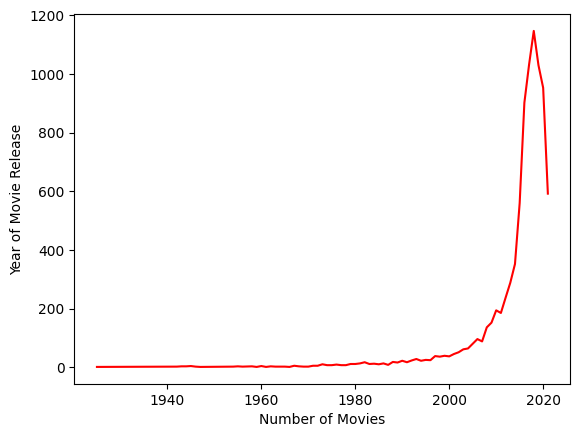

In [91]:
df_year =df_final1.groupby(['release_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data = df_year, x ='release_year', y ='title',color='red')
plt.ylabel('Year of Movie Release')
plt.xlabel('Number of Movies')
plt.show()

Analysing the number of movies added in Netflix yearwise


*   Extracting year, month and date using to datefime function





In [92]:
df_final1['date_added'] = pd.to_datetime(df_final1['date_added'], errors='coerce')

# Extract day, month, and year
df_final1['added_day'] = df_final1['date_added'].dt.day
df_final1['added_month'] = df_final1['date_added'].dt.month
df_final1['added_year'] = df_final1['date_added'].dt.year



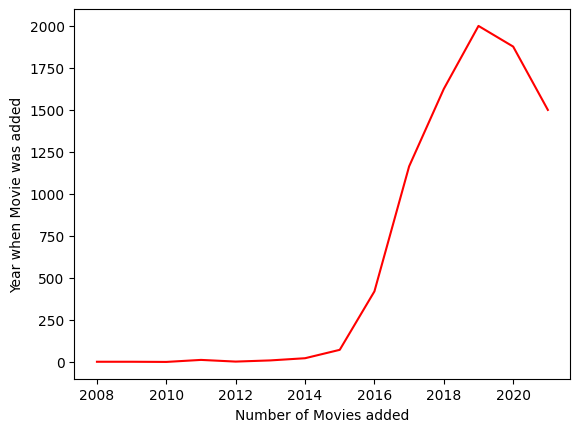

In [93]:
df_year =df_final1.groupby(['added_year']).agg({'title':'nunique'}).reset_index()
sns.lineplot(data = df_year, x ='added_year', y ='title',color='red')
plt.ylabel('Year when Movie was added')
plt.xlabel('Number of Movies added')
plt.show()

Insight: It is observed that until 2019, there was a steady rise in number of movies added in Netflix, while a slight decline was observed in the subsequent years.

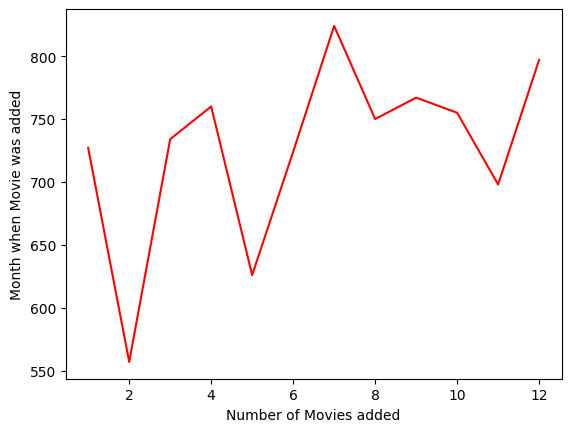

In [94]:
df_month = df_final1.groupby('added_month').agg({'title':'nunique'}).reset_index()
sns.lineplot(data = df_month, x ='added_month', y ='title',color='red')
plt.ylabel('Month when Movie was added')
plt.xlabel('Number of Movies added')
plt.show()

In [95]:
 df_final1.groupby('added_month').agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)

,added_month,title
6,7.0,824
11,12.0,797
8,9.0,767
3,4.0,760
9,10.0,755
7,8.0,750
2,3.0,734
0,1.0,727
5,6.0,724
10,11.0,698


Insight: It is observed that July is the month with the highest number of movies added with 824 movies. February, is the month with fewer number of movies being added.

In [96]:
df_final1.groupby('added_year').agg({'title':'nunique'}).reset_index().sort_values(by='title', ascending=False)

,added_year,title
11,2019.0,2001
12,2020.0,1878
10,2018.0,1626
13,2021.0,1501
9,2017.0,1165
8,2016.0,421
7,2015.0,73
6,2014.0,23
3,2011.0,13
5,2013.0,10


In [97]:
df_TV = df[df_final1['type']=='TV Show']
df_movie = df[df_final1['type']=='Movie']



<ipython-input-97-fb4d4940ba34>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_TV = df[df_final1['type']=='TV Show']
<ipython-input-97-fb4d4940ba34>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_movie = df[df_final1['type']=='Movie']


Countplot for Movies vs TV shows

<ipython-input-98-c54f25a61996>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_counts, x='type', y='title', palette='Set2')


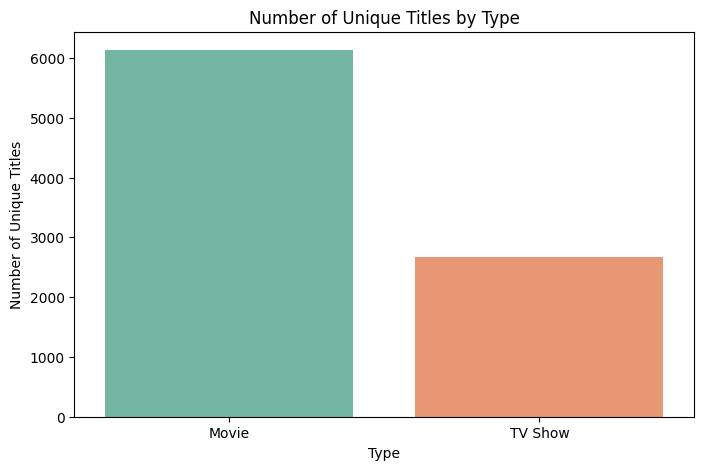

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate data (count unique titles by type)
type_counts = df_final1.groupby('type').agg({'title': 'nunique'}).reset_index()

# Step 2: Bar plot for aggregated data
plt.figure(figsize=(8, 5))
sns.barplot(data=type_counts, x='type', y='title', palette='Set2')
plt.title('Number of Unique Titles by Type')
plt.xlabel('Type')
plt.ylabel('Number of Unique Titles')
plt.show()


Release year Distribution for top 10 countries using Box-Plot



<ipython-input-99-7623e985410d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final1[df_final1['Country'].isin(top_countries)],


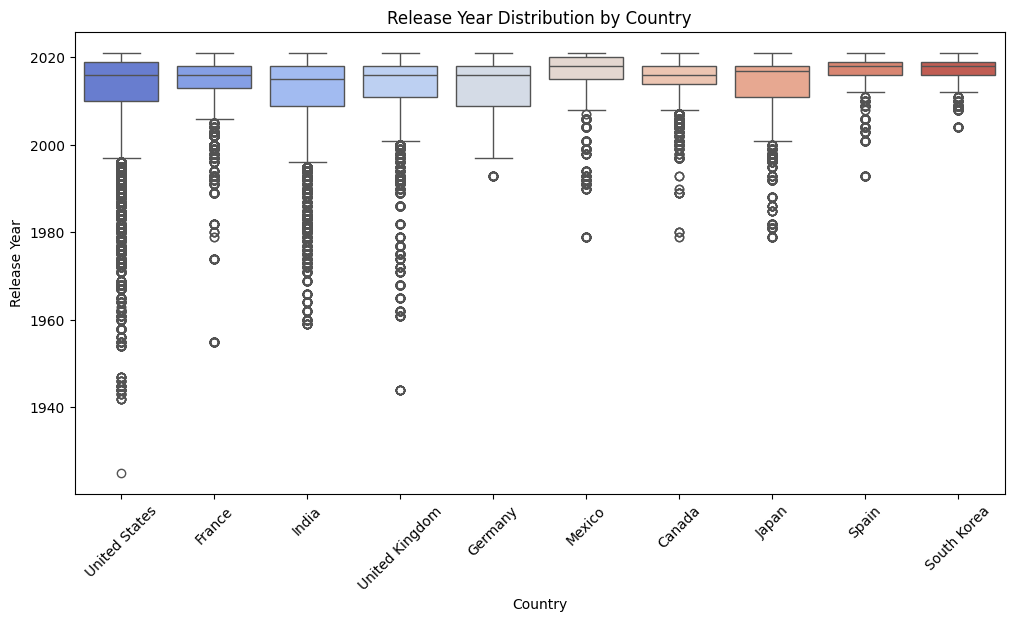

In [99]:
plt.figure(figsize=(12, 6))
top_countries = df_final1['Country'].value_counts().index[:10]  # Top 10 countries
sns.boxplot(data=df_final1[df_final1['Country'].isin(top_countries)],
            x='Country', y='release_year', palette='coolwarm')
plt.title('Release Year Distribution by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Release Year')
plt.show()

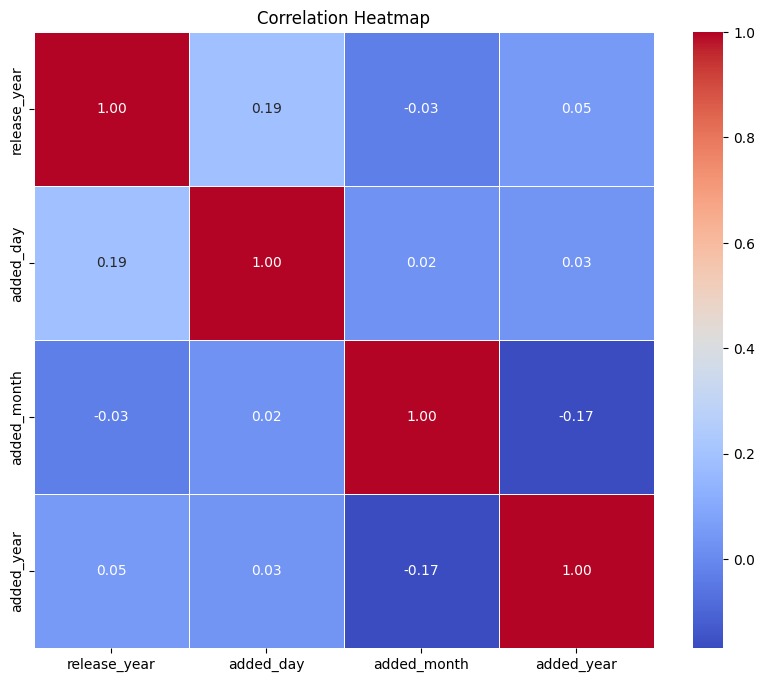

In [100]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_final1.corr(numeric_only=True)  # Only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

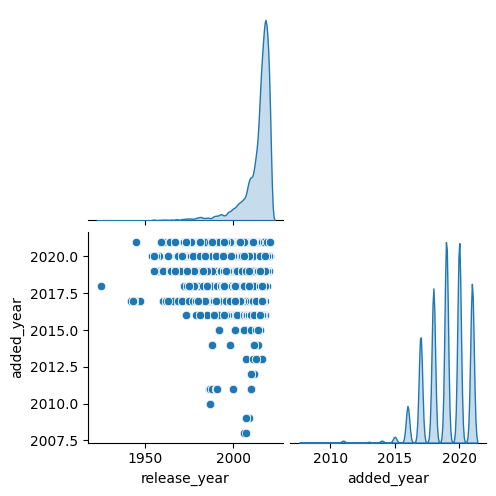

In [101]:
# Pairplot for selected variables
selected_columns = ['release_year', 'added_year', 'duration']  # Use numeric columns
df_numeric = df_final1[selected_columns].dropna()
sns.pairplot(df_numeric, diag_kind='kde', corner=True)
plt.show()

 Insight: The scatter plot shows a positive correlation. This indicates that new movies tend to be added more in Netflix, compared to old films.



## **Comments on the Range of Attributes**

•	Type
The number of movies added dominate the number of TV shows added, indicating the large viewership of movies in Netflix.
•	Rating
TV-MA occupies a large chunk of the Netflix content, suggesting a focus on adult content.
•	Country
Content is produced in over 100 countries, with USA being the highest.
•	Duration
Most of the TV shows have 1-2 seasons, suggesting preference for short TV series.


## **Comments on the distribution of variables and relationship between them**

•	Release year vs Duration
Old movies tend to have short durations.

•	Type vs Release year
Movies tend to have a longer history than TV shows.


## **Business Insights**

*	The most popular genre across the countries are International movies/shows, Drama and Comedy.
* A large number of shows are added in July. Also, a large number of movies are added in the first and last week of a year.


## **Recommendations**
*	**Regional Expansion**:
While the US viewership is to be retained, Netflix should also focus in expanding viewership in countries such as India, which is a home to a large number of actors and directors as observed in dataset.
* **Target Audience:**
Netflix should also come up with children friendly programmes, while retaining its MA content viewership.
* 	**Promote Local Cast and Directors:**
Add the content created by local directors in emerging markets to boost regional viewership and create cultural resonance.
* **Add on Season:**
Add TV shows in July and movies in last and first week of a year.

